In [1]:
from google.colab import drive

drive.mount("/content/drive")

%cd '/content/drive/MyDrive/ckd_uae/'

Mounted at /content/drive
/content/drive/MyDrive/ckd_uae


# Exploratory Data Analysis: CKD_UAE

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from functions import *

In [3]:
# Change directory to where functions.py is located if it's not in '/content'
data_path = "/content/drive/MyDrive/ckd_uae/data/df_eda/"
image_path = "/content/drive/MyDrive/ckd_uae/images/"

In [4]:
df_eda = pd.read_parquet(data_path + "df_eda.parquet")

In [5]:
df_eda.head()

,time_months,sex,cancer,smoking,obesity,hypertension,dyslipidemia,diabetes,cardiovascular_disease,creatinine,outcome,time_years,year_bins
id,,,,,,,,,,,,,
1,116,0,0,0,1,1,1,0,0,59.0,0,9.7,9-10_years
2,116,0,0,0,1,1,1,0,0,52.0,0,9.7,9-10_years
3,101,0,0,0,1,1,1,0,0,57.0,0,8.4,8-9_years
4,117,0,0,0,1,0,1,0,0,65.0,0,9.8,9-10_years
5,119,0,0,0,1,1,1,1,0,70.0,0,9.9,9-10_years


In [6]:
df_eda.shape[0]

1186

In [7]:
df_eda["sex"].value_counts() # value_counts of sex

1    641
0    545
Name: sex, dtype: int64

## Serum Creatinine Levels (in $\mu mol/L$)

The dataset that the authors have furnished measures SCr in $\mu mol/L$ as opposed to $mg/dL$.

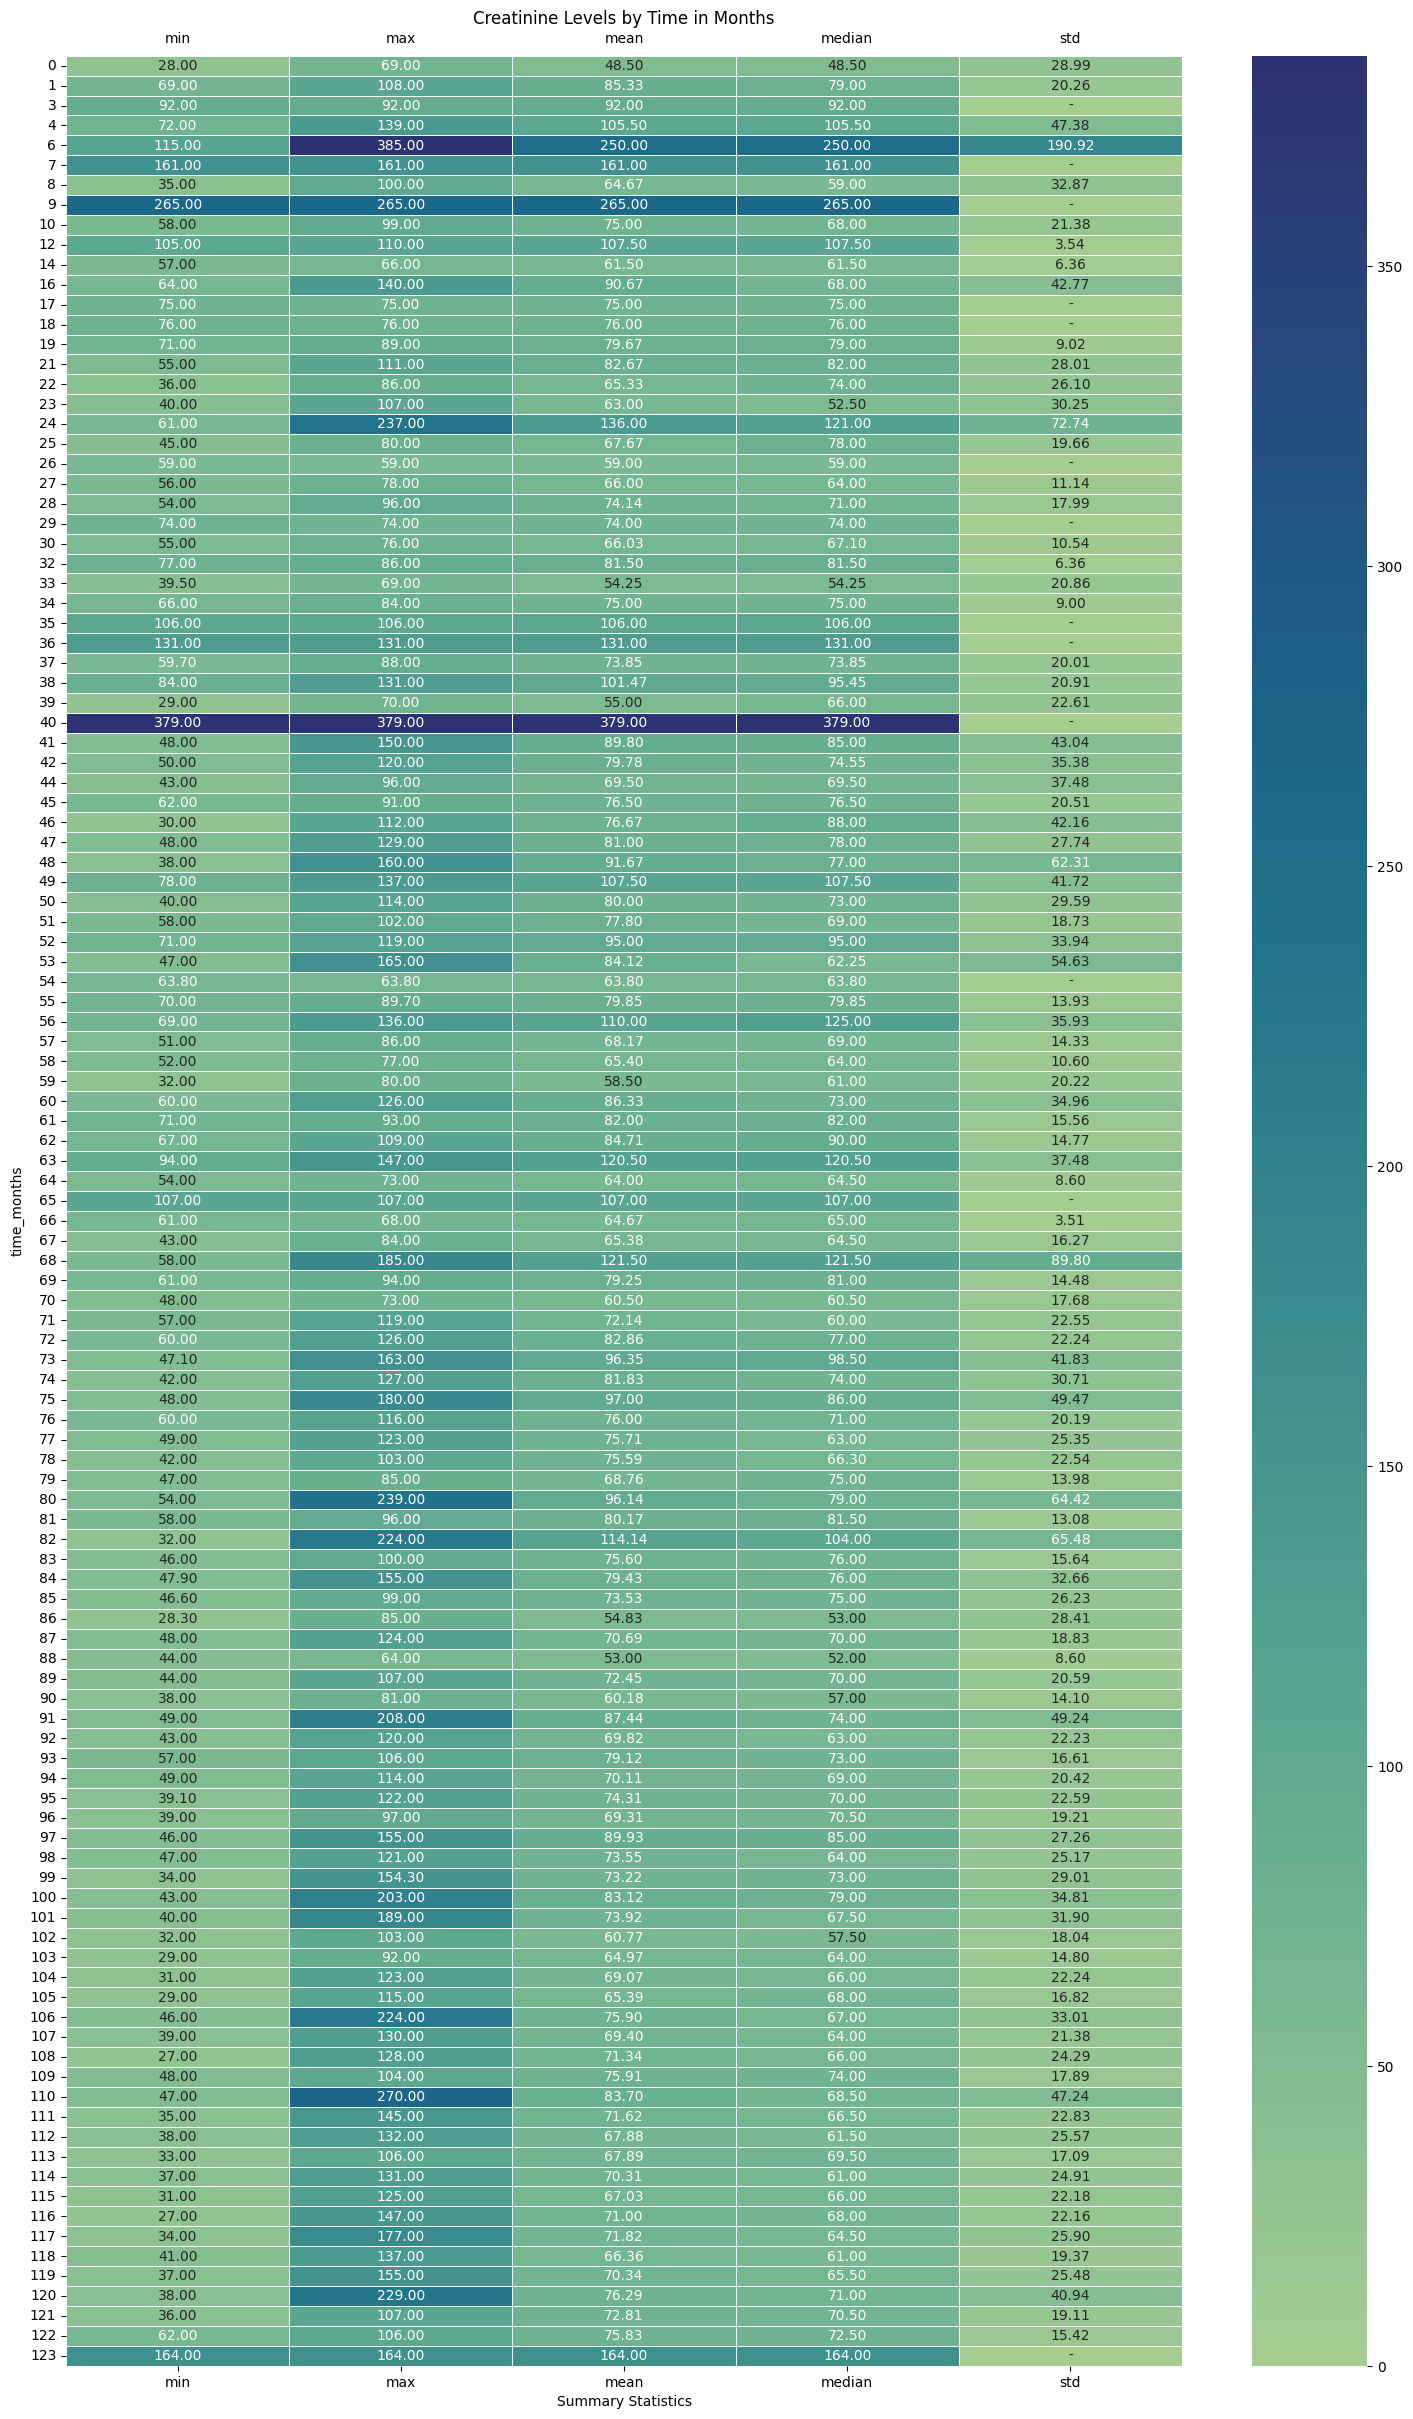

In [8]:
plt.figure(figsize=(18, 30))
sns.heatmap(
    df_eda.groupby("time_months")["creatinine"]
    .agg(["min", "max", "mean", "median", "std"])
    .fillna(0),
    annot=True,
    linewidths=0.5,
    fmt=".2f",
    cmap="crest",
)

# Replace 0s with "-" in the annotations.
for text in plt.gca().texts:
    if text.get_text() == "0.00":
        text.set_text("-")

# Set the title and move the x-axis to the top
plt.title("Creatinine Levels by Time in Months")

# Additional option: Rotate the x-axis labels if needed
plt.xticks(rotation=0)
plt.xlabel("Summary Statistics")
plt.tick_params(labeltop=True, labelbottom=True)
plt.savefig(os.path.join(image_path, "creatinine_levels_crosstab.svg"))
plt.show()

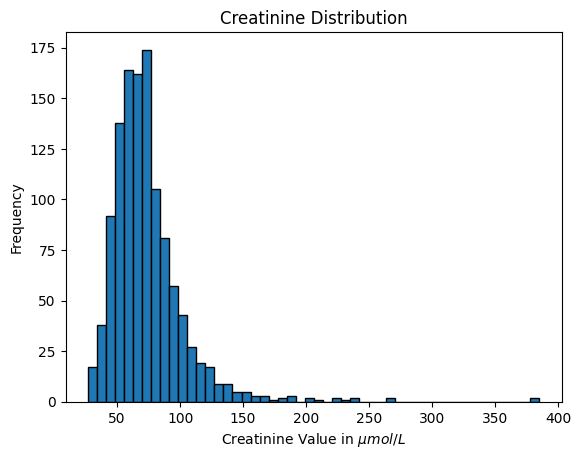

In [9]:
df_eda["creatinine"].hist(bins=50, edgecolor="black", grid=False)
plt.title("Creatinine Distribution")
plt.xlabel("Creatinine Value in $\mu mol/L$")
plt.ylabel("Frequency")
plt.savefig(os.path.join(image_path, "creatinine_hist.svg"))
plt.show()

In [10]:
df_eda["creatinine"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
creatinine,1186.0,74.362563,31.020906,27.0,56.025,69.0,84.0,385.0


## Survivability by Feature

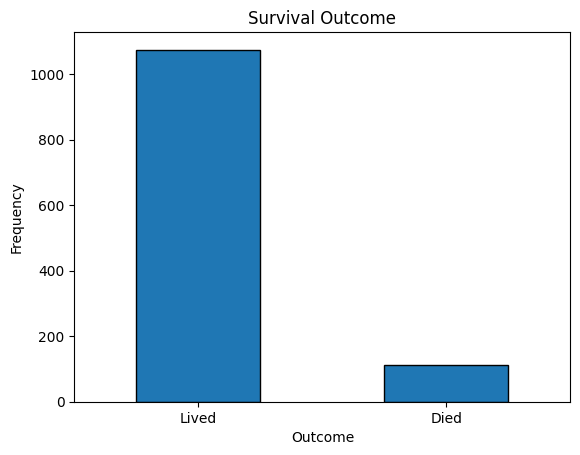


Lived    1074
Died      112
Name: outcome, dtype: int64


In [11]:
ax = df_eda["outcome"].value_counts().plot(kind="bar", rot=0, edgecolor="black")
new_labels = ["Lived", "Died"]
ax.set_xticklabels(new_labels)
plt.title("Survival Outcome")
plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.savefig(os.path.join(image_path, "survival_outcome.svg"))
plt.show()
print()
print(
    df_eda["outcome"].value_counts().rename({0: "Lived", 1: "Died"}),
)

In [12]:
bar_list = df_eda.columns.to_list()
bar_list_remove = ["time_months", "outcome", "creatinine"]
bar_list = [item for item in bar_list if item not in bar_list_remove]
bar_list

['sex',
 'cancer',
 'smoking',
 'obesity',
 'hypertension',
 'dyslipidemia',
 'diabetes',
 'cardiovascular_disease',
 'time_years',
 'year_bins']

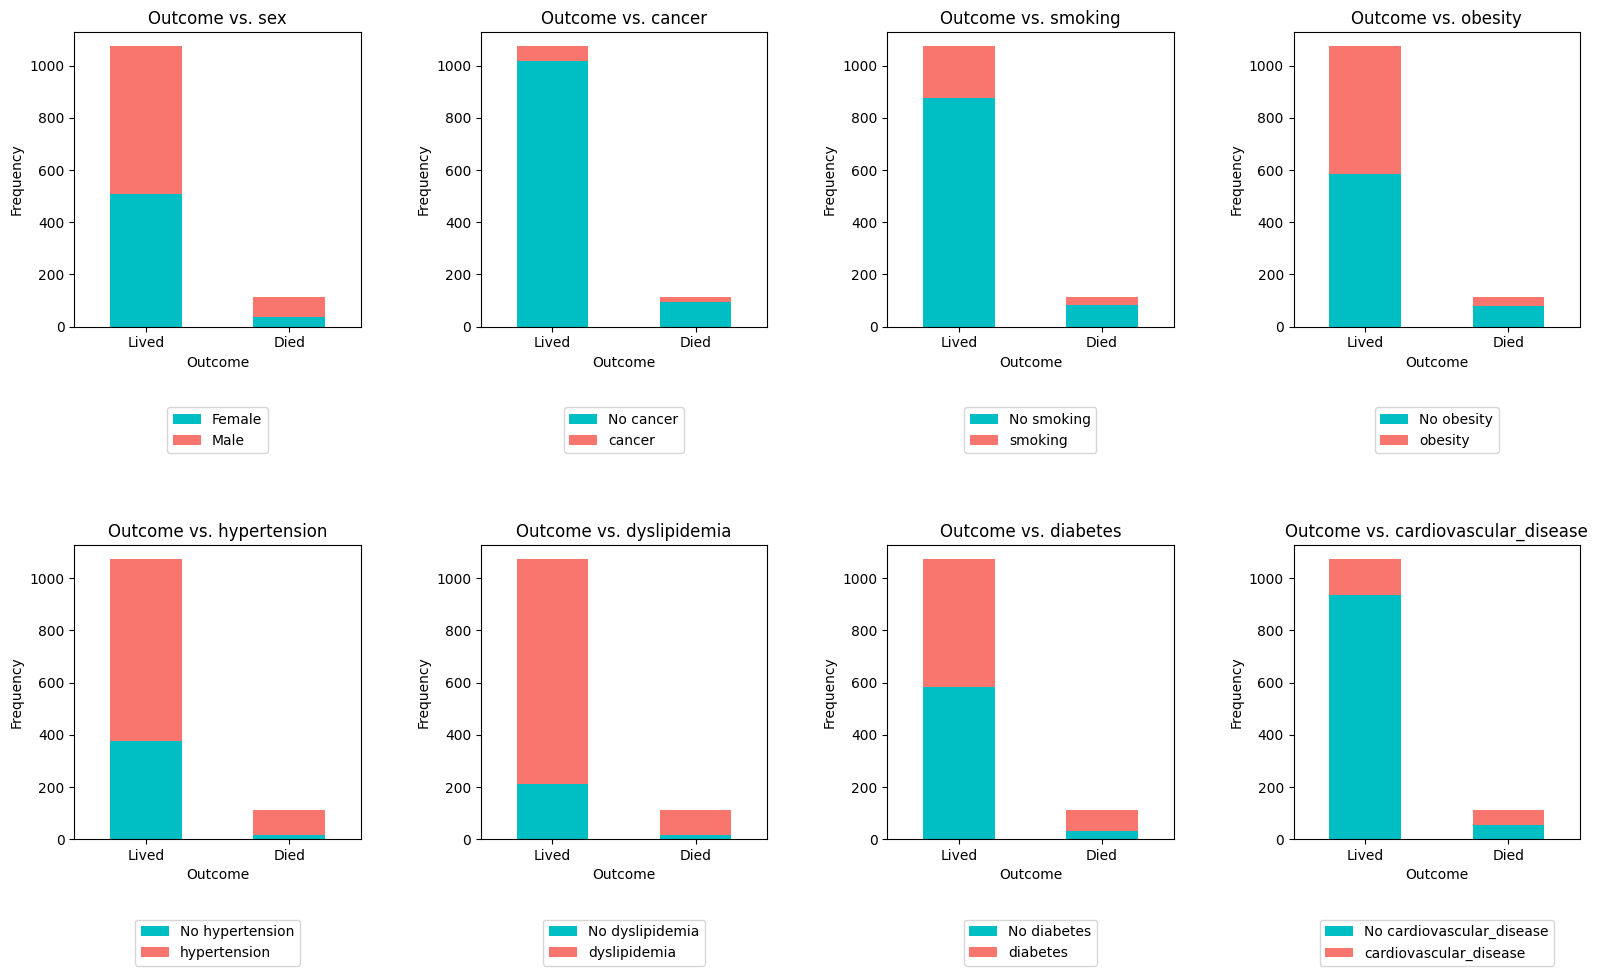

In [13]:
crosstab_plot(
    df=df_eda,
    sub1=2,
    sub2=4,
    x=16,
    y=10,
    list_name=bar_list,
    label1="Lived",
    label2="Died",
    col1="sex",
    item1="Female",
    item2="Male",
    bbox_to_anchor=(0.5, -0.25),
    w_pad=4,
    h_pad=4,
    crosstab_option=True,
    image_path=image_path,
    string="outcome_by_feature.svg"
)

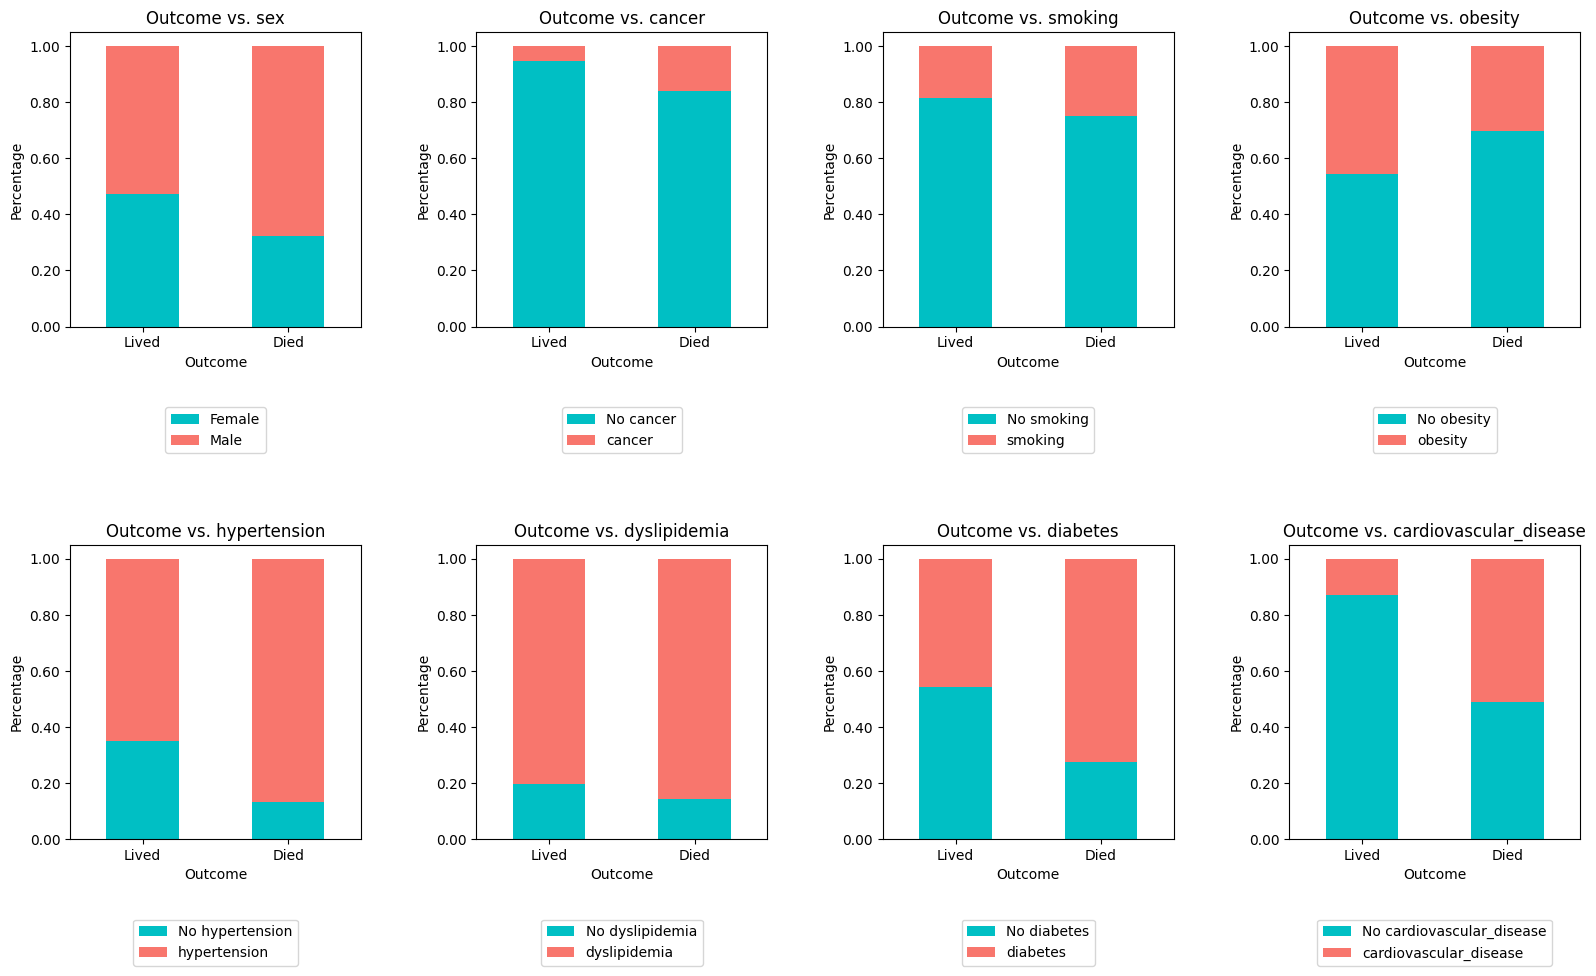

In [14]:
crosstab_plot(
    df=df_eda,
    sub1=2,
    sub2=4,
    x=16,
    y=10,
    list_name=bar_list,
    label1="Lived",
    label2="Died",
    col1="sex",
    item1="Female",
    item2="Male",
    bbox_to_anchor=(0.5, -0.25),
    w_pad=4,
    h_pad=4,
    crosstab_option=False,
    image_path=image_path,
    string="outcome_by_feature_normalized.svg"
)

In [15]:
outcome_by_years = pd.crosstab(
    df_eda["year_bins"], df_eda["outcome"], margins=True, margins_name="Total_Count"
).rename(columns={0: "Lived", 1: "Died"},)
outcome_by_years["Lived_%"] = round(outcome_by_years["Lived"] / outcome_by_years["Total_Count"]*100, 2)
outcome_by_years["Died_%"] = round(outcome_by_years["Died"] / outcome_by_years["Total_Count"]*100, 2)
outcome_by_years["Total_%"] = outcome_by_years["Lived_%"] + outcome_by_years["Died_%"]
outcome_by_years

outcome,Lived,Died,Total_Count,Lived_%,Died_%,Total_%
year_bins,,,,,,
0-1_years,12,8,20,60.00,40.00,100.0
1-2_years,12,14,26,46.15,53.85,100.0
2-3_years,14,12,26,53.85,46.15,100.0
3-4_years,24,11,35,68.57,31.43,100.0
4-5_years,31,11,42,73.81,26.19,100.0
5-6_years,39,10,49,79.59,20.41,100.0
6-7_years,68,19,87,78.16,21.84,100.0
7-8_years,101,9,110,91.82,8.18,100.0
8-9_years,305,14,319,95.61,4.39,100.0


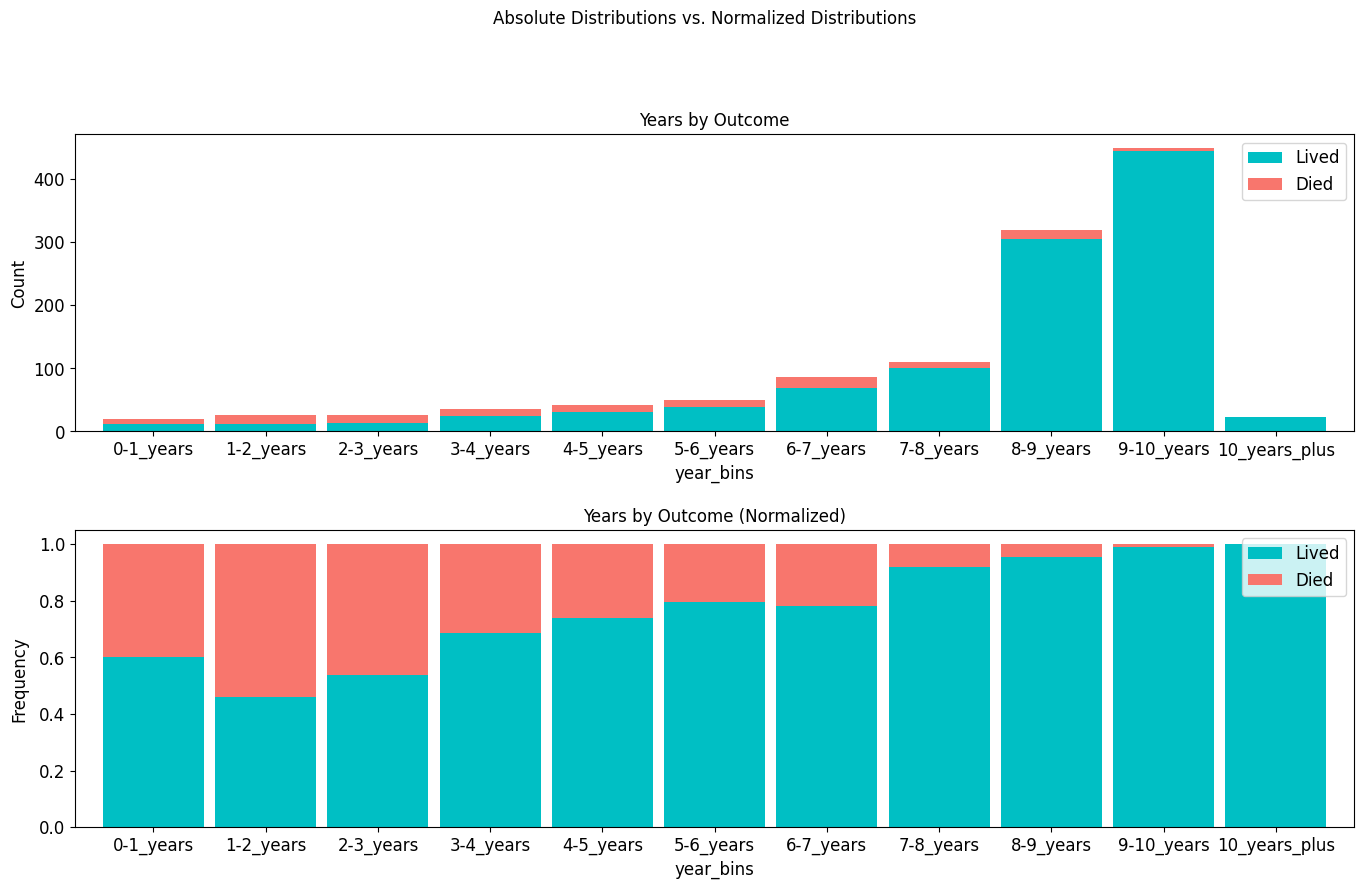

In [16]:
stacked_plot(
    x=16,
    y=10,
    p=10,
    df=df_eda,
    col="year_bins",
    truth="outcome",
    condition=1,
    kind="bar",
    ascending=False,
    width=0.9,
    rot=0,
    string="Years",
    custom_order=[
        "0-1_years",
        "1-2_years",
        "2-3_years",
        "3-4_years",
        "4-5_years",
        "5-6_years",
        "6-7_years",
        "7-8_years",
        "8-9_years",
        "9-10_years",
        "10_years_plus",
    ],
    legend_labels=["Lived", "Died"],
    image_path=image_path,
    img_string="years_by_outcome.svg"
)

## References

Al-Shamsi, S., Govender, R. D., & King, J. (2021). Predictive value of creatinine-based equations of kidney function in the long-term prognosis of United Arab Emirates patients with vascular risk. *Oman medical journal, 36*(1), e217. https://doi.org/10.5001/omj.2021.07


Al-Shamsi, S., Govender, R. D., & King, J. (2019). Predictive value of creatinine-based equations of kidney function in the long-term prognosis of United Arab Emirates patients with vascular risk [Dataset]. Mendeley Data, V1. https://data.mendeley.com/datasets/ppfwfpprbc/1



